In [1]:
import pandas as pd
import numpy as np
import re

In [796]:
with open('../input/day15.txt', 'r') as f:
    inp = f.read()

inp[:10]

'##########'

In [797]:
start_pos = inp.strip().split("\n\n")[0].split("\n")
instructions  = ''.join(inp.split("\n\n")[1].split("\n"))

In [798]:
def init_walls(start_pos):
    walls = []
    for x in range(len(start_pos)):
        for y in range(len(start_pos[0])):
            if start_pos[x][y] == '#':
                walls.append((x,y))

    return walls

In [799]:
def init_boxes(start_pos):
    boxes = []
    for x in range(len(start_pos)):
        for y in range(len(start_pos[0])):
            if start_pos[x][y] == 'O':
                boxes.append((x,y))
    return boxes

In [800]:
def init_actor(start_pos):
    for x in range(len(start_pos)):
        for y in range(len(start_pos[0])):
            if start_pos[x][y] == '@':
                return (x,y)

In [801]:
def move(pos, direc):
    if direc == '^':
        return (pos[0]-1, pos[1])
    if direc == '>':
        return (pos[0], pos[1]+1)
    if direc == '<':
        return (pos[0], pos[1]-1)
    if direc == 'v':
        return (pos[0]+1, pos[1])
       

In [802]:
def check_wall(pos):
    if pos in walls:
        return True      
    return False

In [803]:
def check_box(pos):
    if pos in boxes:
        return True
    return False

In [804]:
def move_box(pos, direc):
    next_pos = move(pos, direc)
    if check_wall(next_pos):
        return 0

    if check_box(next_pos):
        move_box(next_pos, direc)

    if not check_box(next_pos):
        boxes.remove(pos)
        boxes.append(next_pos)


In [805]:
def move_actor(pos, direc):
    return move(pos, direc)

In [806]:
walls = init_walls(start_pos)
boxes = init_boxes(start_pos)
actor = init_actor(start_pos)

In [807]:
actor

(24, 24)

In [808]:
for direc in instructions:
    next_pos = move(actor, direc)
    if check_wall(next_pos):
        continue
        
    if check_box(next_pos):
        move_box(next_pos, direc)
        
    if not check_box(next_pos):
        actor = move_actor(actor, direc)

In [809]:
def calc_gps_coord(box_coord):
    return 100*box_coord[0] + box_coord[1]

In [810]:
p1 = np.sum([calc_gps_coord(box_coord) for box_coord in boxes])
p1

np.int64(1552879)

In [811]:
p2_start_pos = []
for line in start_pos:
    p2_line = line.replace('#', '##').replace('O', '[]').replace('.', '..').replace('@', '@.')
    p2_start_pos.append(p2_line)
p2_start_pos[:10]

['####################################################################################################',
 '##[]##......[]......[]....##........[]..[][][]....##......................[]..##....##..[]....##..##',
 '##......[]..##..[]........[]..[]##..........##[][]........[]........................[]............##',
 '##....[]..##..[][]..[]..............##..[]##[]....##....[]..[]......##..[][]..[][]..[][][]##[]..[]##',
 '##....[]....[]..[]....[]..[]......[][]..[]..[][]..##..####........[]..[]##..[]......##[]....[]....##',
 '##....[]..[]........[]......[]......[]..[][][]..[]..[]..........##..[][]..[]..[]..##[]..[][]..[]..##',
 '##..........[]....##............##............[]..........##........##....[]##[]............[]....##',
 '##..........[][][][]..................[][][]..[]..[]..[]......[][]..[]..............[]..........[]##',
 '####..[]....##..[]..............##..........[][]..............[]......##..................[][]....##',
 '##..[]..##........####....[]..[]....[]##........[][].

In [812]:
def init_boxes_p2(start_pos):
    boxes_l = []
    boxes_r = []
    for x in range(len(start_pos)):
        for y in range(len(start_pos[0])):
            if start_pos[x][y] == '[':
                boxes_l.append((x,y))
            if start_pos[x][y] == ']':
                boxes_r.append((x,y))
    return boxes_l, boxes_r

In [813]:
def check_box_p2(pos):
    if pos in boxes_l or pos in boxes_r:
        return True


In [1126]:
def check_wall_verts_p2(pos, direc):
    next_pos = move(pos, direc)
    if pos in walls:
        return True     
    if pos in boxes_l:
        return (check_wall_verts_p2(next_pos, direc) or check_wall_verts_p2((next_pos[0], next_pos[1]+1), direc))
    if pos in boxes_r:
        return (check_wall_verts_p2(next_pos, direc) or check_wall_verts_p2((next_pos[0], next_pos[1]-1), direc))
    return False

In [1127]:
def move_box_p2(pos, direc):
    next_pos = move(pos, direc)
    next_pos_2 = move(next_pos, direc)

    if direc == '^' or direc == 'v':
        if pos in boxes_l:
            next_pos_com = (next_pos[0], next_pos[1]+1)
            next_pos_2_com = (next_pos_2[0], next_pos_2[1]+1)

        if pos in boxes_r:
            next_pos_com = (next_pos[0], next_pos[1]-1)
            next_pos_2_com = (next_pos_2[0], next_pos_2[1]-1)

        if check_wall_verts_p2(next_pos, direc) or check_wall_verts_p2(next_pos_com, direc):
            return True
            
        if check_box_p2(next_pos):
            move_box_p2(next_pos, direc)

        if check_box_p2(next_pos_com):
            move_box_p2(next_pos_com, direc)

        if (not check_box_p2(next_pos)) and (not check_box_p2(next_pos_com)):
            if pos in boxes_l:
                boxes_l.remove(pos)
                boxes_l.append(next_pos)

                boxes_r.remove((pos[0], pos[1]+1))
                boxes_r.append(next_pos_com)
                
            if pos in boxes_r:
                boxes_r.remove(pos)
                boxes_r.append(next_pos)

                boxes_l.remove((pos[0], pos[1]-1))
                boxes_l.append(next_pos_com)

    if direc == '>' or direc == '<':
        if check_wall(next_pos_2):
            return 0

        if check_box_p2(next_pos_2):
            move_box_p2(next_pos_2, direc)

        if not check_box_p2(next_pos_2):
            if pos in boxes_l:
                boxes_l.remove(pos)
                boxes_l.append(next_pos)

                boxes_r.remove(next_pos)
                boxes_r.append(next_pos_2)
                
            if pos in boxes_r:
                boxes_r.remove(pos)
                boxes_r.append(next_pos)

                boxes_l.remove(next_pos)
                boxes_l.append(next_pos_2)

In [1136]:
walls = init_walls(p2_start_pos)
boxes_l, boxes_r = init_boxes_p2(p2_start_pos)
actor = init_actor(p2_start_pos)

In [1137]:
for direc in instructions:
    next_pos = move(actor, direc)
    if check_wall(next_pos):
        continue
        
    if check_box_p2(next_pos):
        move_box_p2(next_pos, direc)
        
    if not check_box_p2(next_pos):
        actor = move_actor(actor, direc)

In [1138]:
p2 = np.sum([calc_gps_coord(box_coord) for box_coord in boxes_l])
p2

np.int64(1561175)

In [821]:
import matplotlib.pyplot as plt

In [1026]:
def plot_state():
    fig, ax = plt.subplots(figsize=(20,20))
    y_l, x_l = zip(*boxes_l)
    y_r, x_r = zip(*boxes_r)
    y_b, x_b = zip(*walls)
    ax.scatter(x=x_l, y=y_l, marker='4')
    ax.scatter(x=x_r, y=y_r, marker='3')
    ax.scatter(x=x_b, y=y_b, marker='+')
    ax.scatter(actor[1], actor[0], marker='x')
    y_ticks = np.arange(len(p2_start_pos))
    x_ticks = np.arange(len(p2_start_pos[0]))
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.invert_yaxis()
    ax.grid()
    return ax

box
v
^


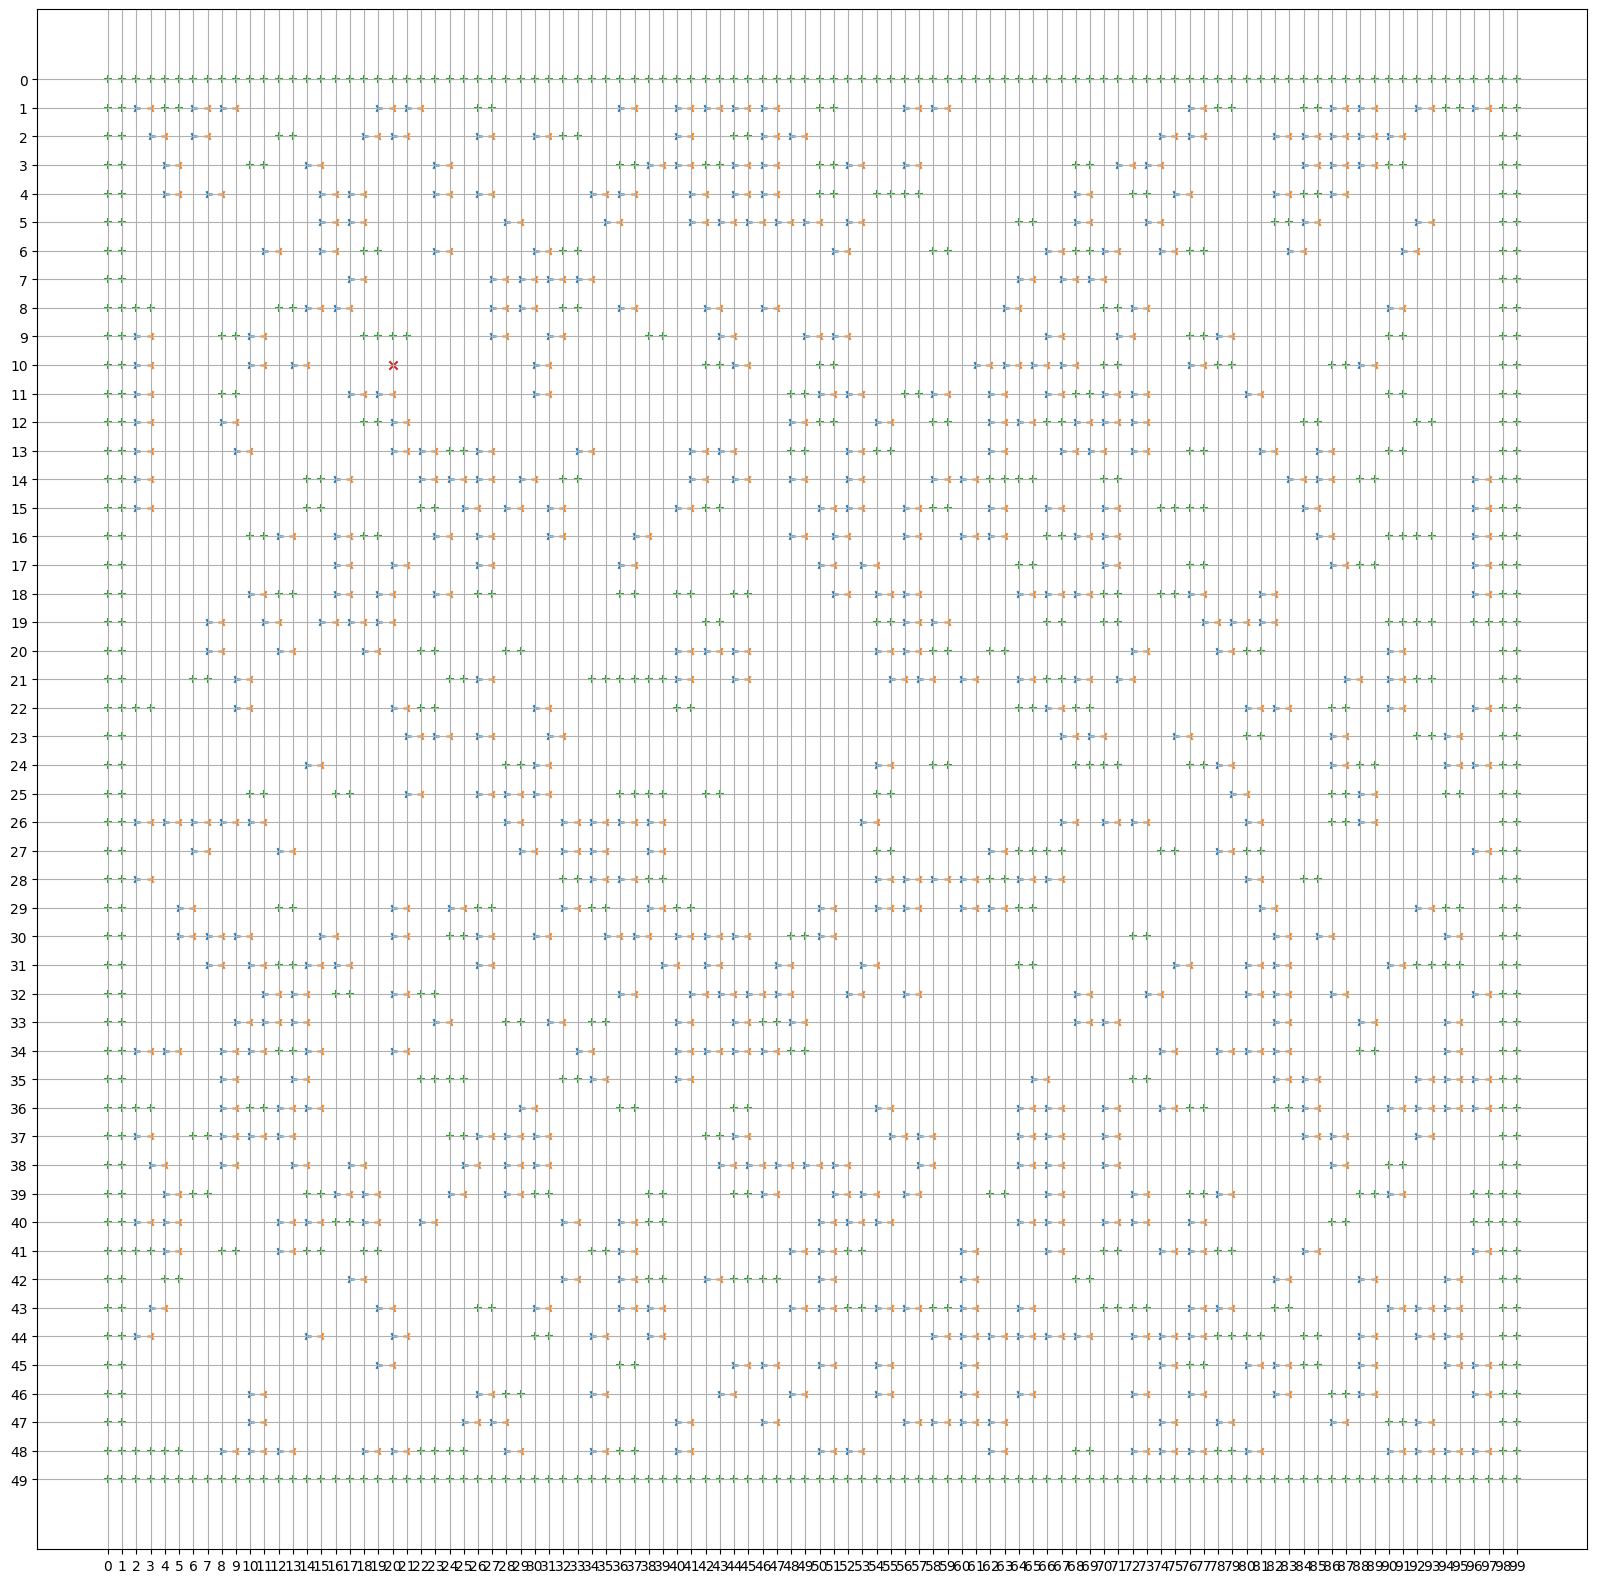

In [1135]:
# direc = instructions[turn]
next_pos = move(actor, direc)
if not check_wall(next_pos):
        
    if check_box_p2(next_pos):
        print('box')
        move_box_p2(next_pos, direc)
        
    if not check_box_p2(next_pos):
        actor = move_actor(actor, direc)
turn += 1
print(direc)
plot_state()
print(instructions[turn])